# Table of Galaxy Groups Below 3500 km s$^{-1}$

Parse the table of galaxy groups at low redshift from [Kourkchi and Tully (2017)](https://iopscience.iop.org/article/10.3847/1538-4357/aa76db#apjaa76dbt2).

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord

In [2]:
mpl.rc('font', size=14)

## Read the Data

See the text file for the format info. Need to use the `fixed_width_no_header` format with column start positions (FORTRAN-style output).

In [3]:
groups = Table.read('apjaa76dbt2_mrt.txt',
                    format='ascii.fixed_width_no_header',
                    names=['PGC1', 'PGC1+', 'Mem', 'GLON', 'GLAT', 'SGL', 'SGB', 'Ksmag', 'logK', 'Vh', 'VLS', 'ND', 'D', 'errD', 'sigmaL', 'sigmaV', 'R2t', 'Rg', 'logMk', 'logMd'],
                    col_starts=np.asarray([1, 9, 17, 21, 30, 39, 48, 57, 63, 69, 74, 79, 83, 89, 92, 96, 100, 106, 112, 119])-1,
                   )

In [4]:
groups

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd
int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243


## Select Groups with Many Members

Plot the groups with:
* At least 20 members.
* A distance with uncertainty below 25%.

In [5]:
select = (groups['Mem'] >= 20) & (groups['errD']/groups['D'] < 0.25)

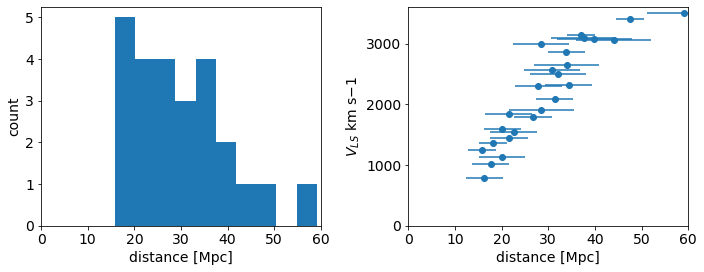

In [6]:
fig, axes = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
ax = axes[0]
ax.hist(groups['D'][select])
ax.set(xlabel='distance [Mpc]',
       xlim=(0,60),
       ylabel='count')
ax = axes[1]
ax.errorbar(groups['D'][select], groups['VLS'][select], xerr=groups['errD'][select], fmt='o')
ax.set(xlabel='distance [Mpc]',
       xlim=(0,60),
       ylabel='$V_{LS}$ km s${-1}$',
       ylim=(0,3600));

In [7]:
def plot_radec(coords, dist):
    """Mollweide projection plot adapted to astro coordinates.
    
    Parameters
    ----------
    table : astropy.table.Table
        Data table with secondary target info.
    
    Returns
    -------
    coords : ndarray
        Array of SkyCoords.
    mag : ndarray
        Array of optical magnitudes.
    classified : ndarray
        True if classification is available.
    """
    fig, ax = plt.subplots(1,1, figsize=(12,6), subplot_kw={'projection': 'mollweide'})
    _ra = np.radians(120) - coords.ra.to_value('rad')
    _ra[_ra < -np.pi] += 2*np.pi
    _dec = coords.dec.to_value('rad')

    sc = ax.scatter(_ra, _dec, s=5000/dist**2, cmap='magma', alpha=0.7)

    # Clean up the plot and return the Figure object.
    ax.set(xticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           xticklabels=['270', '240', '210', '180', '150', '120', '90', '60', '30', '0', '330'])
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(ls=':')
    
    return fig;

## Plot Group Positions

Plot the groups' RA and Dec. Make the size of the marker proportional to 1/(distance)$^2$.

In [8]:
coords = SkyCoord(l=groups['GLON'][select], b=groups['GLAT'][select], unit='deg', frame='galactic').transform_to('icrs')
dist = groups['D'][select]

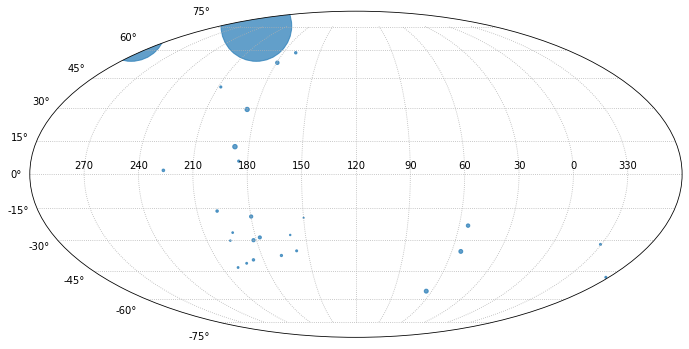

In [9]:
fig = plot_radec(coords, dist)